##Rahmat Hidayat
##Submission Dicoding Predictive analysis Sales Supermarket

##Pertama, import library yang dibutuhkan. Anda dapat melakukannya di awal, atau di tiap kode sel.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Crawling Data

In [4]:
url = "https://github.com/Rahmathidayat4299/data-machine-learning/raw/refs/heads/master/supermarket_sales%20-%20Sheet1.csv"
salesmarket = pd.read_csv(url)
salesmarket


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Konversi Tinggi

# Cleaning Process Data
Proses membersihkan data mulai dari pengecekan :

*   Pengecekan null pada data
*   Pengecekan duplicated pada data
*   Pengecekan Outlier pada data

Data yang bersih akan memudah melatih model dan menghasilkan prediksi yang baik






In [31]:
salesmarket.describe()
checkbodynull = salesmarket.isnull().sum()
checkbodyduplicate = salesmarket.duplicated().sum()
checkbodynull
checkbodyduplicate

0

# Penanganan Outlier

In [8]:
import pandas as pd

# Menentukan kolom yang relevan untuk cek outlier
numerical_columns = ['Unit price', 'Quantity', 'Total', 'Rating']

# Menghitung Q1 (Kuartil Pertama) dan Q3 (Kuartil Ketiga)
Q1 = salesmarket[numerical_columns].quantile(0.25)
Q3 = salesmarket[numerical_columns].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan outlier pada masing-masing kolom
outliers = salesmarket[
    (salesmarket['Unit price'] < lower_bound['Unit price']) | (salesmarket['Unit price'] > upper_bound['Unit price']) |
    (salesmarket['Quantity'] < lower_bound['Quantity']) | (salesmarket['Quantity'] > upper_bound['Quantity']) |
    (salesmarket['Total'] < lower_bound['Total']) | (salesmarket['Total'] > upper_bound['Total']) |
    (salesmarket['Rating'] < lower_bound['Rating']) | (salesmarket['Rating'] > upper_bound['Rating'])
]

# Menampilkan outlier yang terdeteksi
print("Jumlah outlier pada DataFrame:", len(outliers))
print(outliers)


Jumlah outlier pada DataFrame: 9
      Invoice ID Branch       City Customer type  Gender         Product line  \
166  234-65-2137      C  Naypyitaw        Normal    Male   Home and lifestyle   
167  687-47-8271      A     Yangon        Normal    Male  Fashion accessories   
350  860-79-0874      C  Naypyitaw        Member  Female  Fashion accessories   
357  554-42-2417      C  Naypyitaw        Normal  Female    Sports and travel   
422  271-88-8734      C  Naypyitaw        Member  Female  Fashion accessories   
557  283-26-5248      C  Naypyitaw        Member  Female   Food and beverages   
699  751-41-9720      C  Naypyitaw        Normal    Male   Home and lifestyle   
792  744-16-7898      B   Mandalay        Normal  Female   Home and lifestyle   
996  303-96-2227      B   Mandalay        Normal  Female   Home and lifestyle   

     Unit price  Quantity  Tax 5%     Total       Date   Time      Payment  \
166       95.58        10  47.790  1003.590  1/16/2019  13:32         Cash   


In [11]:
from scipy import stats
import numpy as np

# Menghitung Z-score untuk kolom numerik
z_scores = np.abs(stats.zscore(salesmarket[numerical_columns]))

# Menyaring outlier berdasarkan Z-score > 3
outliers_zscore = salesmarket[(z_scores > 3).any(axis=1)]

# Menampilkan outlier yang terdeteksi
print("Jumlah outlier pada DataFrame berdasarkan Z-score:", len(outliers_zscore))
print(outliers_zscore)


Jumlah outlier pada DataFrame berdasarkan Z-score: 0
Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []


In [12]:
# Menghapus outlier berdasarkan batas bawah dan atas
salesmarketclean = salesmarket[
    (salesmarket['Unit price'] >= lower_bound['Unit price']) & (salesmarket['Unit price'] <= upper_bound['Unit price']) &
    (salesmarket['Quantity'] >= lower_bound['Quantity']) & (salesmarket['Quantity'] <= upper_bound['Quantity']) &
    (salesmarket['Total'] >= lower_bound['Total']) & (salesmarket['Total'] <= upper_bound['Total']) &
    (salesmarket['Rating'] >= lower_bound['Rating']) & (salesmarket['Rating'] <= upper_bound['Rating'])
]

# Menampilkan jumlah data setelah penghapusan outlier
print("Jumlah data setelah outlier dihapus:", len(salesmarketclean))

# Menampilkan beberapa data setelah outlier dihapus
print(salesmarketclean.head())


Jumlah data setelah outlier dihapus: 991
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83               

In [14]:
salesmarketclean.describe()
salesmarketclean.info()
salesmarketclean.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               991 non-null    object 
 1   Branch                   991 non-null    object 
 2   City                     991 non-null    object 
 3   Customer type            991 non-null    object 
 4   Gender                   991 non-null    object 
 5   Product line             991 non-null    object 
 6   Unit price               991 non-null    float64
 7   Quantity                 991 non-null    int64  
 8   Tax 5%                   991 non-null    float64
 9   Total                    991 non-null    float64
 10  Date                     991 non-null    object 
 11  Time                     991 non-null    object 
 12  Payment                  991 non-null    object 
 13  cogs                     991 non-null    float64
 14  gross margin percentage  991 no

0

# Menjawab Pertanyaan
  ## Bagaimana kita bisa memprediksi total penjualan (Total) dari kombinasi variabel seperti jenis pelanggan, jenis produk, dan lokasi cabang?

In [15]:
# Mengubah variabel kategorikal menjadi numerik menggunakan One-Hot Encoding
df_encoded = pd.get_dummies(salesmarketclean, columns=['Customer type', 'Product line', 'Branch', 'City', 'Gender', 'Payment'], drop_first=True)


#Model Development
#Langkah 1: Memisahkan Fitur dan Target
Selanjutnya, kita pisahkan fitur (X) dan target (y), di mana target adalah variabel Total.

In [16]:
# Menentukan fitur dan target
X = df_encoded.drop(columns=['Total', 'Invoice ID', 'Date', 'Time'])  # Menghapus kolom yang tidak relevan
y = df_encoded['Total']


## Langkah 2: Membagi Data untuk Pelatihan dan Pengujian
Kita perlu membagi data menjadi data pelatihan dan data pengujian untuk mengevaluasi kinerja model.

In [18]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Langkah 3: Membangun Model Regresi
## Regresi Linier
Kita bisa memulai dengan Regresi Linier untuk memprediksi total penjualan berdasarkan fitur-fitur yang ada.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Membangun model regresi linier
linear_model = LinearRegression()

# Melatih model
linear_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_linear = linear_model.predict(X_test)

# Mengukur kinerja model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'R-squared (Linear Regression): {r2_linear}')


Mean Squared Error (Linear Regression): 5.9590156367880044e-27
R-squared (Linear Regression): 1.0


# Xgboost

In [20]:
import xgboost as xgb

# Membangun model XGBoost
xgboost_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Melatih model
xgboost_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_xgb = xgboost_model.predict(X_test)

# Mengukur kinerja model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')


Mean Squared Error (XGBoost): 10.015544887803555
R-squared (XGBoost): 0.9998445931675414


# Validasi Model:

Cross-Validation: Lakukan k-fold cross-validation untuk memastikan model Anda konsisten pada berbagai subset data.

In [21]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgboost_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean R² score:", cv_scores.mean())


Cross-validation R² scores: [0.99976072 0.99981771 0.99973329 0.99958303 0.99952699]
Mean R² score: 0.9996843479617927


# Analisis Feature Importance:
*   Identifikasi fitur mana yang paling berpengaruh terhadap prediksi total penjualan.
*   Fitur Unit price, Tax 5%, dan Rating adalah yang paling berpengaruh dalam model, yang menunjukkan bahwa harga dan pajak memainkan peran kunci dalam memprediksi total penjualan.
* Fitur-fitur lain seperti Quantity, tipe pelanggan, dan metode pembayaran memberikan kontribusi yang lebih kecil, namun masih relevan untuk meningkatkan akurasi prediksi.


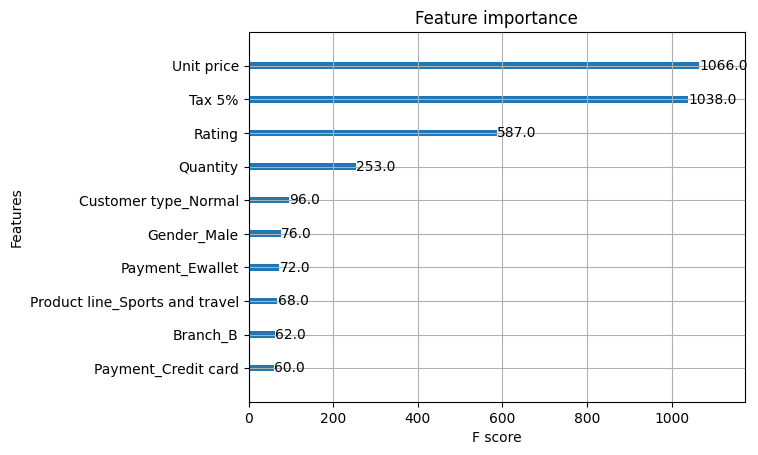

In [22]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgboost_model, max_num_features=10)
plt.show()


# Hyperparameter Tuning:
 meningkatkan performa model melalui hyperparameter tuning menggunakan Grid Search atau Random Search.

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgboost_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}


In [26]:
import xgboost as xgb
# Melatih ulang model dengan parameter terbaik
xgb_best = xgb.XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=0.7
)

# Fit ulang model dengan data pelatihan
xgb_best.fit(X_train, y_train)

# Melakukan prediksi pada test set
y_pred = xgb_best.predict(X_test)

# Evaluasi performa model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 7.124830911330524
R-squared: 0.9998894471128493


#Evaluasi Model
## Visualisasi Hasil Prediksi
Grafik ini menunjukkan bagaimana hasil prediksi dibandingkan dengan nilai aktual. Idealnya, jika model Anda sempurna, semua titik akan berada pada garis 45 derajat (prediksi = nilai aktual).

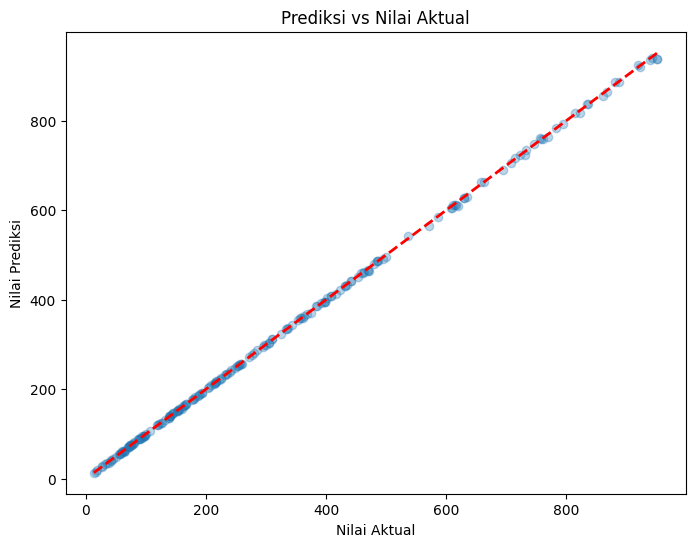

In [27]:
import matplotlib.pyplot as plt

# Plot Prediksi vs Nilai Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Nilai Aktual')
plt.show()


# Residual Plot:
Residual plot dapat membantu mengidentifikasi pola dari error model. Residual adalah selisih antara nilai aktual dan prediksi. Plot residual yang tersebar secara acak di sekitar 0 menunjukkan bahwa model memprediksi dengan baik dan tidak ada pola sistematis dalam error.

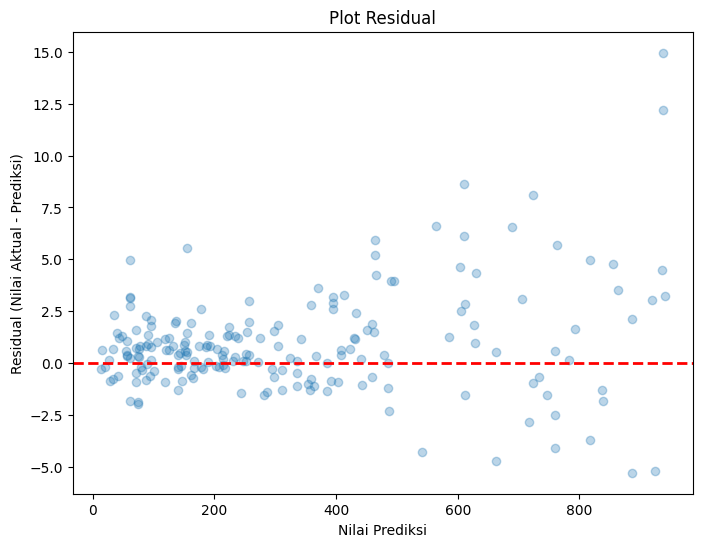

In [28]:
# Menghitung residual
residuals = y_test - y_pred

# Plot Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residual (Nilai Aktual - Prediksi)')
plt.title('Plot Residual')
plt.show()


# Distribusi Error (Histogram dari Residual):
Dengan melihat distribusi residual, Anda bisa mengecek apakah error tersebar dengan normal, yang mengindikasikan model yang baik.

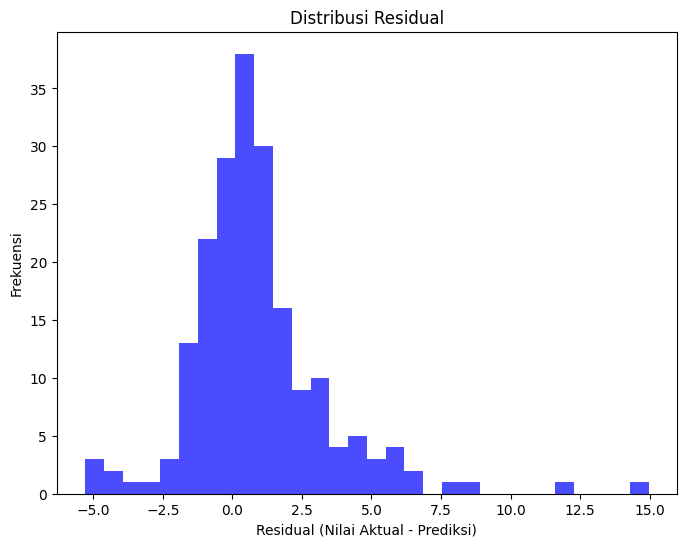

In [29]:
# Plot distribusi residual (error)
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.xlabel('Residual (Nilai Aktual - Prediksi)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Residual')
plt.show()


# Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE) untuk memahami performa model.

Mean Absolute Error (MAE) memberikan rata-rata absolut error yang lebih mudah diinterpretasikan karena tidak memberikan penalti lebih tinggi untuk outlier.
Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE dan memberikan gambaran yang lebih intuitif terkait dengan skala error.

In [30]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1.738900289487598
Root Mean Squared Error (RMSE): 2.6692378896101645
